# Laboratory #02 : Image Operators and Filters

At the end of this laboratory, you would get familiarized with

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

### **Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [323]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure# , filter

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

![black_and_white_patches.png](https://drive.google.com/uc?export=view&id=1Iuf870gS6DuFzMtnXs53DLuiXy0oARaw)

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


In [324]:
# solution
# We create an array of zeros and then set the corresponding
# values to 255 (white) to replicate each corresponding image
I1 = np.zeros((100,100))
I1[:,50:100] = 255
I2 = np.zeros((100,100))
I2[50:,:] = 255
I3 = np.zeros((100,100))
I3[:50,:50]= 255
I1,I2, I3

(array([[  0.,   0.,   0., ..., 255., 255., 255.],
        [  0.,   0.,   0., ..., 255., 255., 255.],
        [  0.,   0.,   0., ..., 255., 255., 255.],
        ...,
        [  0.,   0.,   0., ..., 255., 255., 255.],
        [  0.,   0.,   0., ..., 255., 255., 255.],
        [  0.,   0.,   0., ..., 255., 255., 255.]]),
 array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.]]),
 array([[255., 255., 255., ...,   0.,   0.,   0.],
        [255., 255., 255., ...,   0.,   0.,   0.],
        [255., 255., 255., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]]))

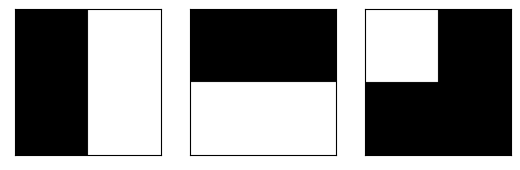

In [325]:
# Ploting the arrays to get the images
fig, axs = plt.subplots(1,3)
axs[0].imshow(I1, cmap='gray')
axs[1].imshow(I2, cmap='gray')
axs[2].imshow(I3, cmap='gray')
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

*   Use the above three images to create the following image

![color_patches.png](https://drive.google.com/uc?export=view&id=1UxmFHToC4TUjgtB7UQMbB3DM3RIZlgBZ)

*Hint: Remember channels and color spaces*

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


([], [])

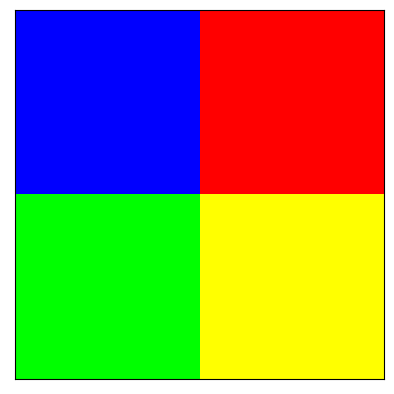

In [326]:
# solution
# The 2D images we just created work as a single channel in a 3D RGB image,
# also the values we set on the 2D images have the correct positioning that
# when we stack them we get a 3D RGB image that has the same colors as the
# square of the example
IC = np.moveaxis(np.array([I1,I2,I3]),0,-1)
plt.imshow(IC)
plt.xticks([])
plt.yticks([])

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

![sillas.jpg](https://drive.google.com/uc?export=view&id=1Ged9FdDWIcipbNxNatGgCZyRdQvcGtoG)

*   Extract individual channels and plot them using matplotlib subplot.



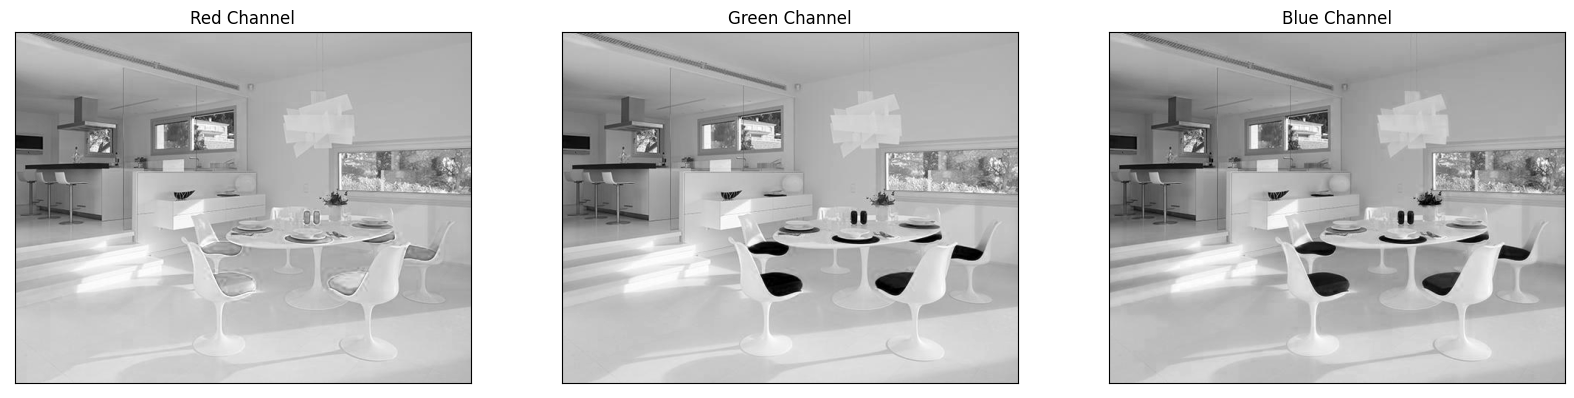

In [327]:
# solution
sillas = plt.imread('images/sillas.jpg')
r = sillas[:,:,0]
g = sillas[:,:,1]
b = sillas[:,:,2]

fig, axs = plt.subplots(1,3, figsize=(20,20))
axs[0].imshow(r, cmap = 'gray',)
axs[0].set_title('Red Channel')
axs[1].imshow(g, cmap = 'gray')
axs[1].set_title('Green Channel')
axs[2].imshow(b, cmap = 'gray')
axs[2].set_title('Blue Channel')
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

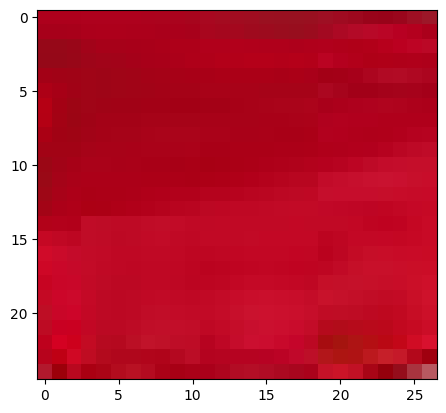

In [328]:
# solution
plt.imshow(sillas[330:355, 285:312,:])

In [329]:
rmin = sillas[330:355, 285:312,:][:,:,0].min()-40
rmax = sillas[330:355, 285:312,:][:,:,0].max()+39
gmin = sillas[330:355, 285:312,:][:,:,1].min()
gmax = sillas[330:355, 285:312,:][:,:,1].max()+10
bmin = sillas[330:355, 285:312,:][:,:,2].min()-10
bmax = sillas[330:355, 285:312,:][:,:,2].max()+50

rmin,rmax,gmin,gmax,bmin,bmax

(108, 255, 0, 99, 0, 147)

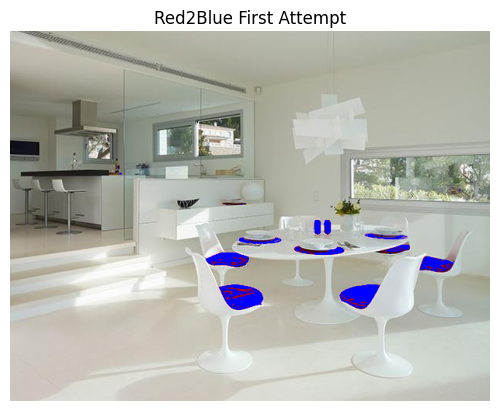

In [330]:
newr = np.where((rmin < r) & (r< rmax) & (gmin < g) & (g< gmax) & (bmin < b) & (b< bmax), r*0, r)
newg = np.where((rmin < r) & (r< rmax) & (gmin < g) & (g< gmax) & (bmin < b) & (b< bmax), g*0, g)
newb = np.where((rmin < r) & (r< rmax) & (gmin < g) & (g< gmax) & (bmin < b) & (b< bmax), 255, b)

newimg = np.moveaxis(np.array([newr,newg,newb]),0,-1)

plt.imshow(newimg)
plt.axis('off')
_ = plt.title('Red2Blue First Attempt')

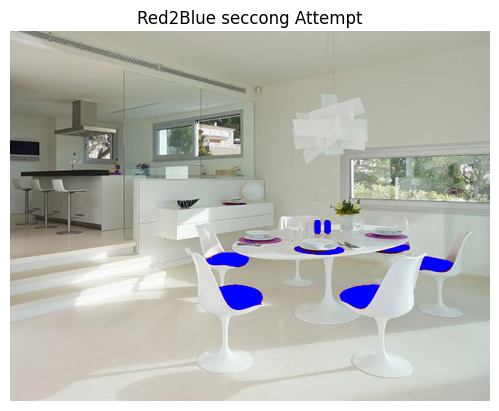

In [331]:
newr = np.where((r > 100) & (g < 90) & (b < 90), r*0, r)
newg = np.where((r > 100) & (g < 90) & (b < 90), g*0, g)
newb = np.where((r > 100) & (g < 90) & (b < 90), 255, b)

newimg = np.moveaxis(np.array([newr,newg,newb]),0,-1)

plt.imshow(newimg)
plt.axis('off')
_ = plt.title('Red2Blue seccong Attempt')

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

![model_and_coat.png](https://drive.google.com/uc?export=view&id=1DOieJOrfwe34z0-3EEBVyX1Ac45sb5SN)


In [332]:
Model = plt.imread('images/model.png')
Coat = plt.imread('images/coat.png')
Texture = plt.imread('images/texture2.png')

Model.shape, Coat.shape, Texture.shape

((1188, 915, 4), (1188, 915, 4), (1188, 915, 3))

In [333]:
rC = Coat[:,:,0]
gC = Coat[:,:,1]
bC = Coat[:,:,2]

rM = Model[:,:,0]
gM = Model[:,:,1]
bM = Model[:,:,2]

rT = Texture[:,:,0]
gT = Texture[:,:,1]
bT = Texture[:,:,2]

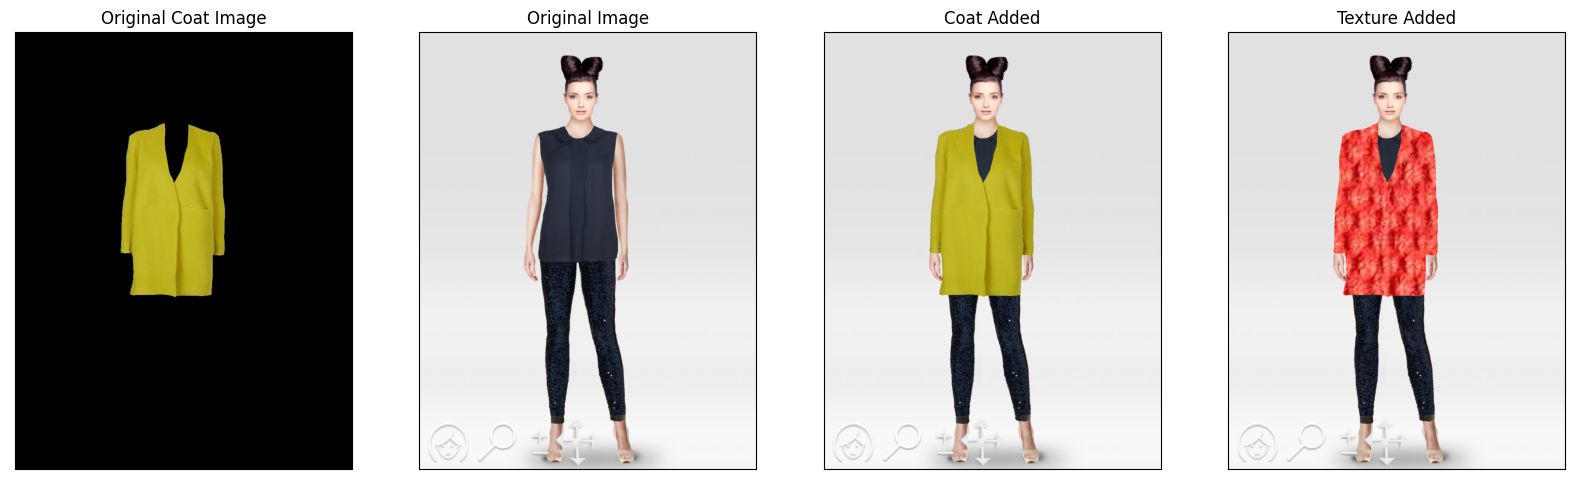

In [334]:
#Coat
newr = np.where((rC != 0) & (gC != 0) & (bC != 0), rC, rM)
newg = np.where((rC != 0) & (gC != 0) & (bC != 0), gC, gM)
newb = np.where((rC != 0) & (gC != 0) & (bC != 0), bC, bM)

model_with_coat = np.moveaxis(np.array([newr,newg,newb]),0,-1)

#Texture
newr = np.where((rC != 0) & (gC != 0) & (bC != 0), rT, rM)
newg = np.where((rC != 0) & (gC != 0) & (bC != 0), gT, gM)
newb = np.where((rC != 0) & (gC != 0) & (bC != 0), bT, bM)

coat_texture1 = np.moveaxis(np.array([newr,newg,newb]),0,-1)

fig, axs = plt.subplots(1,4, figsize=(20,20))
axs[0].imshow(Coat)
axs[0].set_title('Original Coat Image')
axs[1].imshow(Model)
axs[1].set_title('Original Image')
axs[2].imshow(model_with_coat)
axs[2].set_title('Coat Added')
axs[3].imshow(coat_texture1)
axs[3].set_title('Texture Added')

fig.patch.set_alpha(0.2)
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




Text(0, 0.5, 'Count of Pixels')

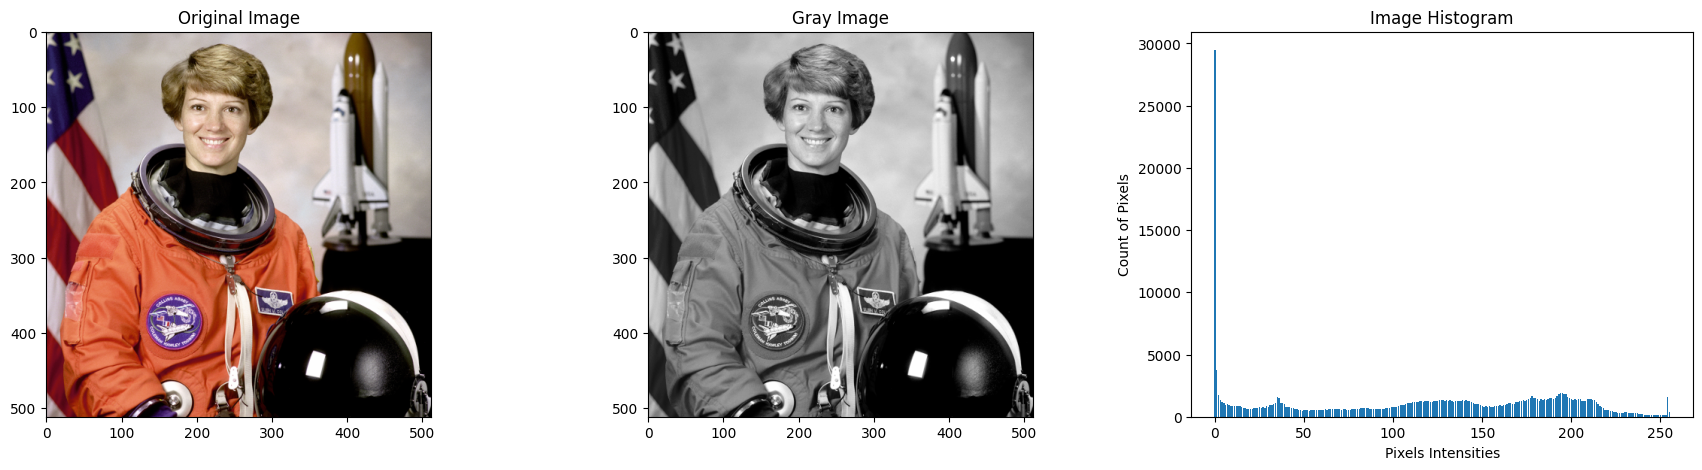

In [335]:
# solution
import matplotlib
import skimage.exposure as ske
from skimage.color import rgb2gray

astronaut = data.astronaut()
astronaut_gray = rgb2gray(astronaut)

fig, axs = plt.subplots(1,3, figsize = (22,5))
axs[0].imshow(astronaut)
axs[0].set_title('Original Image')
axs[1].imshow(astronaut_gray, cmap='gray')
axs[1].set_title('Gray Image')
axs[2].bar(list(range(256)),ske.histogram(astronaut_gray)[0])
axs[2].set_title('Image Histogram')
axs[2].set_xlabel('Pixels Intensities')
axs[2].set_ylabel('Count of Pixels')

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

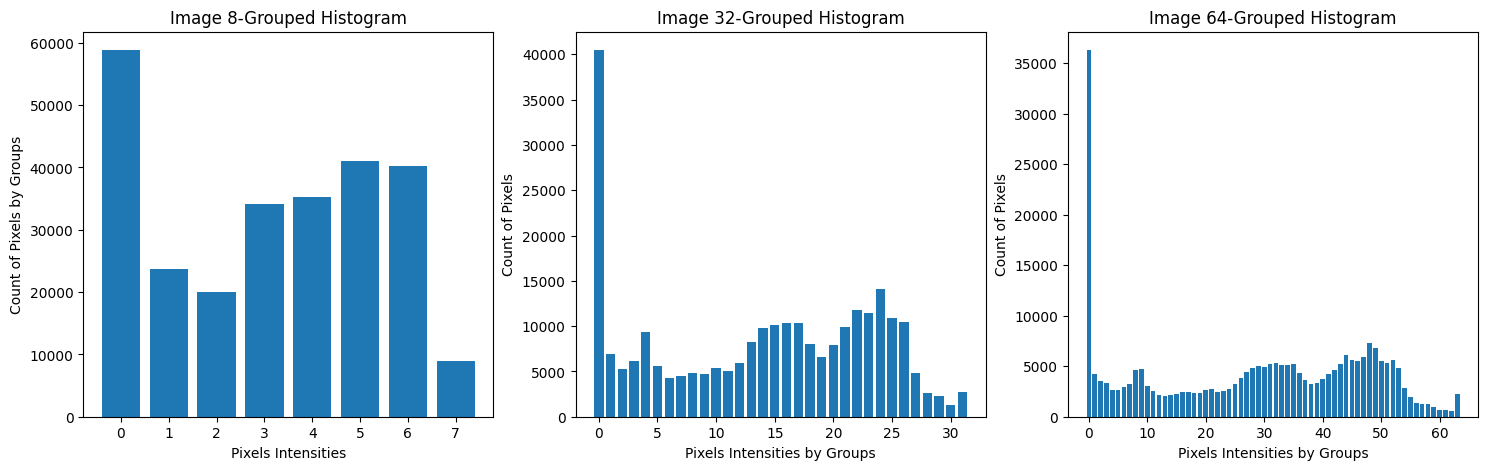

In [336]:
# solution
fig, axs = plt.subplots(1,3, figsize = (18,5))
axs[0].bar(list(range(8)),ske.histogram(astronaut_gray, 8)[0])
axs[0].set_title('Image 8-Grouped Histogram')
axs[0].set_xlabel('Pixels Intensities')
axs[0].set_ylabel('Count of Pixels by Groups')
axs[1].bar(list(range(32)),ske.histogram(astronaut_gray, 32)[0])
axs[1].set_title('Image 32-Grouped Histogram')
axs[1].set_xlabel('Pixels Intensities by Groups')
axs[1].set_ylabel('Count of Pixels')
axs[2].bar(list(range(64)),ske.histogram(astronaut_gray, 64)[0])
axs[2].set_title('Image 64-Grouped Histogram')
axs[2].set_xlabel('Pixels Intensities by Groups')
_ = axs[2].set_ylabel('Count of Pixels')



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

*(Double-click or enter to edit)*

...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


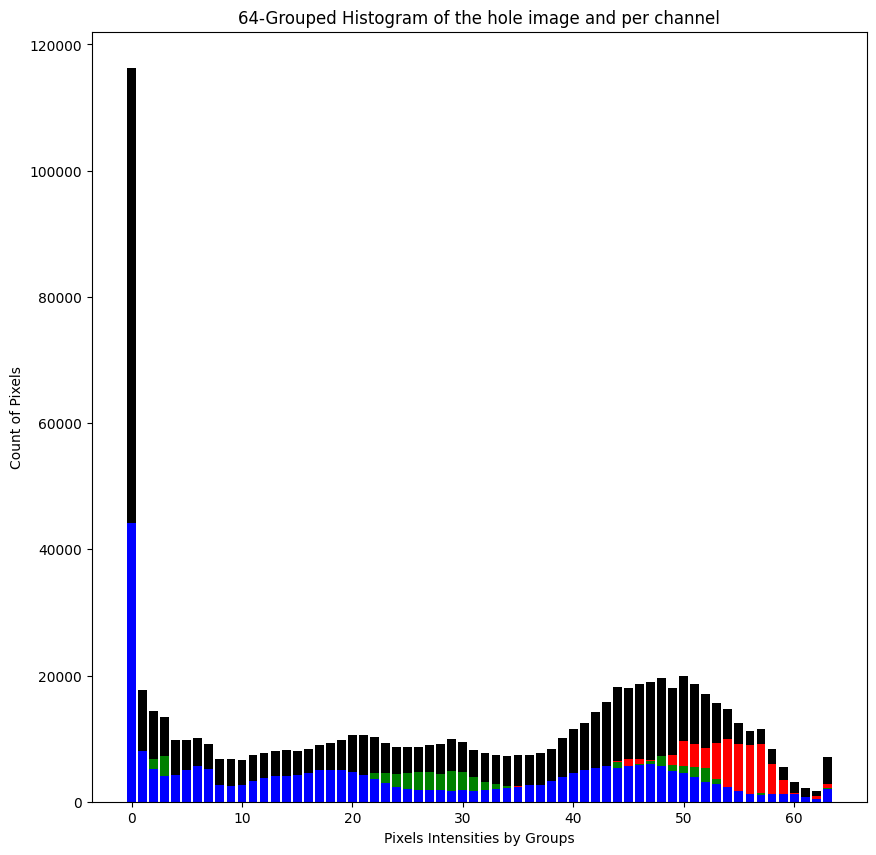

In [337]:
fig = plt.figure(figsize=(10,10))
plt.bar(list(range(64)),sum(ske.histogram(astronaut.astype('float'),64, channel_axis=2)[0]), color = 'black')
plt.bar(list(range(64)),ske.histogram(astronaut[:,:,0].astype('float'),64)[0], color = 'red')
plt.bar(list(range(64)),ske.histogram(astronaut[:,:,1].astype('float'),64)[0], color = 'green')
plt.bar(list(range(64)),ske.histogram(astronaut[:,:,2].astype('float'),64)[0], color = 'blue')
plt.title('64-Grouped Histogram of the hole image and per channel')
plt.xlabel('Pixels Intensities by Groups')
_ = plt.ylabel('Count of Pixels')

### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



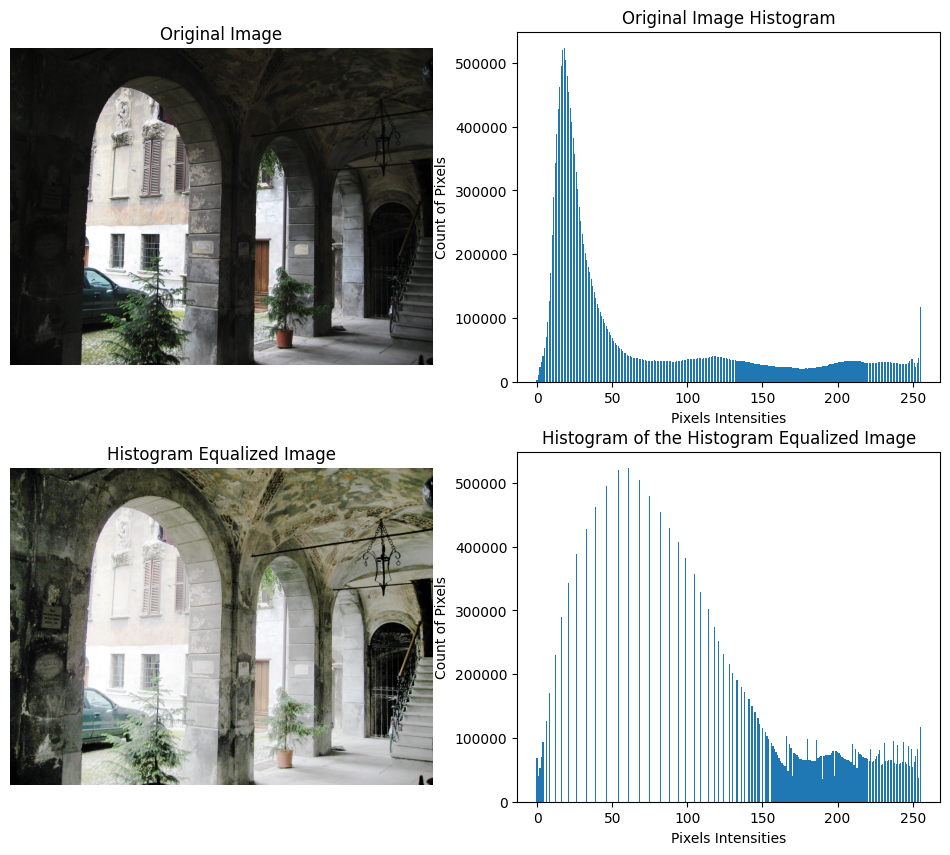

In [338]:
aqua = plt.imread('images/aquatermi_lowcontrast.jpg')
aqua_eq = ske.equalize_hist(aqua, nbins=64)

fig, axs = plt.subplots(2,2, figsize=(12,10))
axs[0,0].imshow(aqua)
axs[0,0].set_title('Original Image')
axs[0,0].axis('off')
axs[0,1].bar(list(range(256)),ske.histogram(aqua.astype('float'))[0])
axs[0,1].set_title('Original Image Histogram')
axs[0,1].set_xlabel('Pixels Intensities')
axs[0,1].set_ylabel('Count of Pixels')
axs[1,0].imshow(aqua_eq)
axs[1,0].set_title('Histogram Equalized Image')
axs[1,0].axis('off')
axs[1,1].bar(list(range(256)),ske.histogram(aqua_eq.astype('float'))[0])
axs[1,1].set_title('Histogram of the Histogram Equalized Image')
axs[1,1].set_xlabel('Pixels Intensities')
_ = axs[1,1].set_ylabel('Count of Pixels')


*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

*When the bin count is lowered, each bucket has a larger number of values, since it is representing a larger range of pixel intensities. Bin count does impact inference. For example, if there is a lower number of bins, you have less specific information about the image. In our first histogram, it is clear that there is a large number of pure black pixels. However, in the second histogram, we see that there are a large number of dark pixels (ie pixels in the first bucket), but we do not know that these pixels are pure black. Additionally, in the second histogram, it appears that there are almost as many pixels of moderate intensity as there are of dark intensity, whereas, in reality, there is a higher contrast between dark pixels and lighter ones as according to the first, more detailed histogram. An ideal bin count, therefore, is 256, so that the whole range of pixel intensities is represented.*

...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



In [339]:
# solution
# lenna = plt.imread('images/lenna_low_contrast.jpg')
# lenna = plt.imread('images/deer.jpg')
# lenna = plt.imread('images/aquatermi_lowcontrast.jpg')
lenna = plt.imread('images/stretch_original.jpg')
# lenna = rgb2gray(lenna)


def LCS(img,bins):
    img_c = img.copy()
    i_max = img_c.max()
    i_min = img_c.min()
    img_c = ((img_c-i_min)/(i_max-i_min))*bins
    return img_c


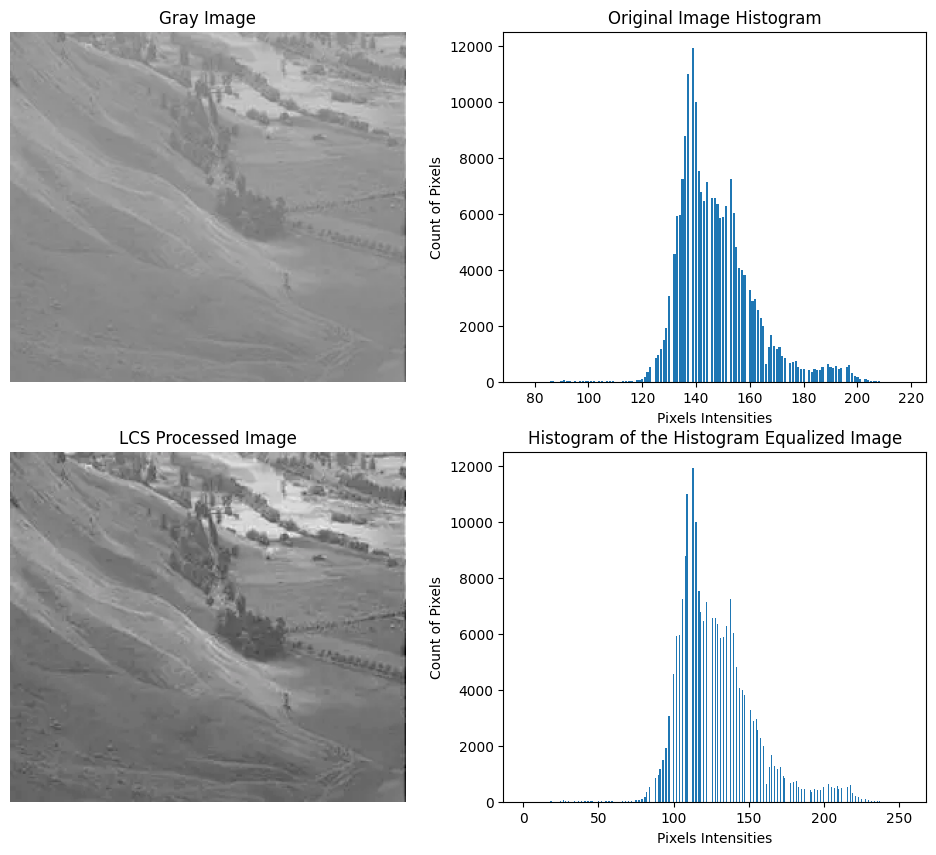

In [340]:
lenna_LCS = LCS(lenna, 255)

fig, axs = plt.subplots(2,2, figsize=(12,10))
axs[0,0].imshow(lenna, cmap='gray')
axs[0,0].set_title('Gray Image')
axs[0,0].axis('off')
axs[0,1].bar(list(range(int(lenna.min()),int(lenna.max()+1))),ske.histogram(lenna)[0])
axs[0,1].set_title('Original Image Histogram')
axs[0,1].set_xlabel('Pixels Intensities')
axs[0,1].set_ylabel('Count of Pixels')
axs[1,0].imshow(lenna_LCS.astype('uint8'), cmap='gray')
axs[1,0].set_title('LCS Processed Image')
axs[1,0].axis('off')
axs[1,1].bar(list(range(256)),ske.histogram(lenna_LCS)[0])
axs[1,1].set_title('Histogram of the Histogram Equalized Image')
axs[1,1].set_xlabel('Pixels Intensities')
_ = axs[1,1].set_ylabel('Count of Pixels')

In [341]:
lenna.min(),'--', lenna.max(), '    ', lenna_LCS.min(),'--', lenna_LCS.max()

(76, '--', 218, '    ', 0.0, '--', 255.0)

# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




In [ ]:
# solution
coins = data.coins()
disk_selem = skimage.morphology.disk(20)
disk_selem_30 = skimage.morphology.disk(30)
disk_selem_10 = skimage.morphology.disk(10)

fig, axs = plt.subplots(1,4, figsize=(15,15))
axs[0].imshow(coins, cmap='gray')
axs[1].imshow(skimage.filters.rank.mean(coins, disk_selem), cmap='gray')
axs[2].imshow(skimage.filters.rank.mean(coins, disk_selem_30), cmap='gray')
_=axs[3].imshow(skimage.filters.rank.mean(coins, disk_selem_10), cmap='gray')

*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

In [ ]:
# solution
# solution
square_selem = skimage.morphology.square(20)
rectangle_selem = skimage.morphology.rectangle(20,40)
star_selem = skimage.morphology.star(20)
diamond_selem = skimage.morphology.diamond(10)

fig, axs = plt.subplots(2,4, figsize=(15,15))
_=axs[0,0].imshow(square_selem)
_=axs[1,0].imshow(skimage.filters.rank.mean(coins, square_selem), cmap='gray')
_=axs[0,1].imshow(rectangle_selem)
_=axs[1,1].imshow(skimage.filters.rank.mean(coins, rectangle_selem), cmap='gray')
_=axs[0,2].imshow(star_selem)
_=axs[1,2].imshow(skimage.filters.rank.mean(coins, star_selem), cmap='gray')
_=axs[0,3].imshow(diamond_selem)
_=axs[1,3].imshow(skimage.filters.rank.mean(coins, diamond_selem), cmap='gray')

*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

*A greater radius has a greater smoothing effect, while a smaller radius has a lesser smoothing effect.*

...


*   What is the observed behaviour with difference in the structuring element?



**Solution**
The structuring element will smooth the image according to its own shape. For example, a horizontal rectangle smooths in a horizontal direction, etc.
...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

*(Double-click or enter to edit)*

...


---

## **End of P2: Image operators and filters**

Deadline for P2 submission in CampusVirtual is: **Thursday, the 6th of October, 2022**
